# <center >Data Science with Python 
## <center >Statistical and Data Techniques in Data Science 
##  <center> Homework 4

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Question 1: Data information
* Download data from the link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
(or `customers.csv` in the folder attached ).
* Import the data as the name 'data' and check the data head, shape, types, columms. (*Hint:*   `.head()`, `.shape`, `.dtypes`, `.columns.tolist()`.).
* Convert columns excluding 'Channel' and 'Region' to floats if necessary (*Hint:*  `.astype(np.float)`.)
* Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used 

In [1]:
import pandas as pd
import numpy as np
# Write your code from here, add more cells if needed
customers = pd.read_csv("customers.csv")

In [2]:
customers.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [3]:
customers.shape

(440, 8)

In [4]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
customers.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [6]:
customers = customers.drop(axis=1, labels=['Channel', 'Region', 'Frozen', 'Detergents_Paper', 'Delicassen'])
for col in customers.columns:
    customers[col] = customers[col].astype(np.float)

customers.head()


Fresh    Milk  Grocery
0  12669.0  9656.0   7561.0
1   7057.0  9810.0   9568.0
2   6353.0  8808.0   7684.0
3  13265.0  1196.0   4221.0
4  22615.0  5410.0   7198.0

### Quesiton 2: Statistical Description
In this question, we only work on the feature 'Grocery'.
 * Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
 * Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
 * Make a boxplot of the annual spending on grocery products.
 * Make a histogram of the annual spending on grocery products.

In [7]:
# Write your answer from here, add more cells if needed
import scipy.stats as ss 
import matplotlib.pyplot as plt

groc_desc = customers.describe().Grocery
display(groc_desc['min':'max']) # min, 25%, 50%, 75%, max
display(('mean', groc_desc['mean'])) # mean
display(('std', groc_desc['std'])) # std
display(('range', groc_desc['max'] - groc_desc['min'])) # range
display(('skew', ss.skew(customers.Grocery))) # range

plt.boxplot(customers.Grocery.values)
plt.show()

min        3.00
25%     2153.00
50%     4755.50
75%    10655.75
max    92780.00
Name: Grocery, dtype: float64

('mean', 7951.277272727273)

('std', 9503.162828994344)

('range', 92777.0)

('skew', 3.5751872200807875)

<Figure size 640x480 with 1 Axes>

### Question 3: Correlation
* Calculate the correlation of 'Grocery' and 'Milk'.
* Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
* Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
* Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )

In [8]:
np.corrcoef(customers.Grocery, customers.Milk)

array([[1.        , 0.72833512],
       [0.72833512, 1.        ]])

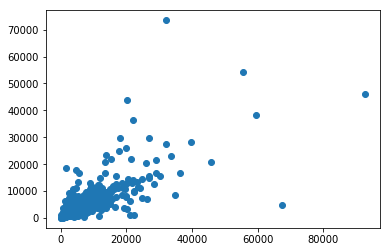

In [9]:
# Write your answer from here, add more cells if needed
plt.scatter(customers.Grocery, customers.Milk)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f4c59b0>,
      dtype=object)

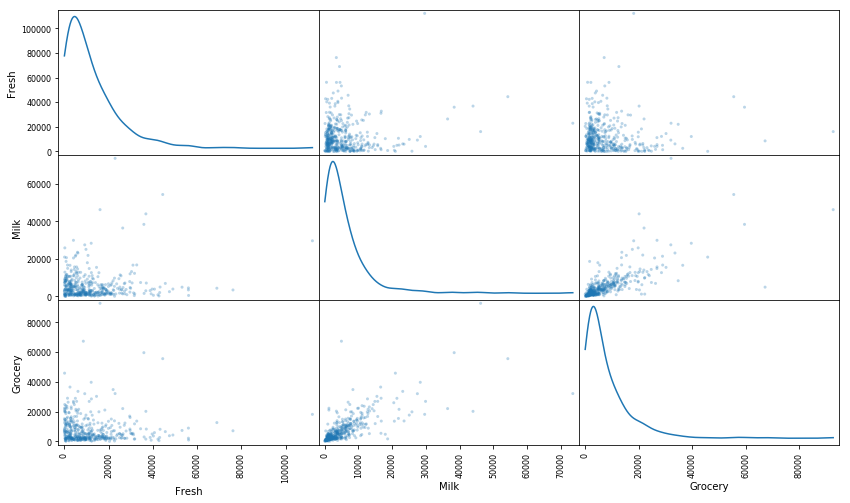

In [10]:
pd.plotting.scatter_matrix(customers, alpha = 0.3, figsize = (14,8), diagonal = 'kde')


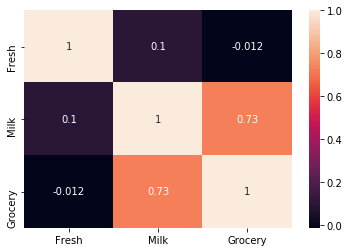

In [11]:
import seaborn as sns
sns.heatmap(customers.corr(), annot=True)


### Question 4: Hypothesis testing (part 1)
* Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

In [12]:
# Write your answer from here, add more cells if needed
import numpy as np
import scipy.stats as ss
c, p = ss.pearsonr(customers.Grocery, customers.Milk)
print("customers.Grocery, customers.Milk")
print("Correlation:", c)
print("p-value for non-correlation:", p)

c, p = ss.pearsonr(customers.Grocery, customers.Fresh)
print("customers.Grocery, customers.Fresh")
print("Correlation:", c)
print("p-value for non-correlation:", p)

c, p = ss.pearsonr(customers.Fresh, customers.Milk)
print("customers.Fresh, customers.Milk")
print("Correlation:", c)
print("p-value for non-correlation:", p)

customers.Grocery, customers.Milk
Correlation: 0.7283351181536448
p-value for non-correlation: 6.480570788053402e-74
customers.Grocery, customers.Fresh
Correlation: -0.011853874984010514
p-value for non-correlation: 0.8041728013490431
customers.Fresh, customers.Milk
Correlation: 0.1005097682998585
p-value for non-correlation: 0.03506100703784227


GM corelate
GF non-corelate
FM corelate

### Question 5: Data Preprocessing
* Transform the data by using `np.log` and set the new data as the name 'log_data', then visualize this data by using `pd.scatter_matrix`.
* Remove outliers of each features of 'log_data' whose are out of the fencies "$Q1-IQR*1.5$" and "$Q3+IQR*1.5$", set the new data by the name 'good_log_data' then visualize this data.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2065bba8>,
      dtype=object)

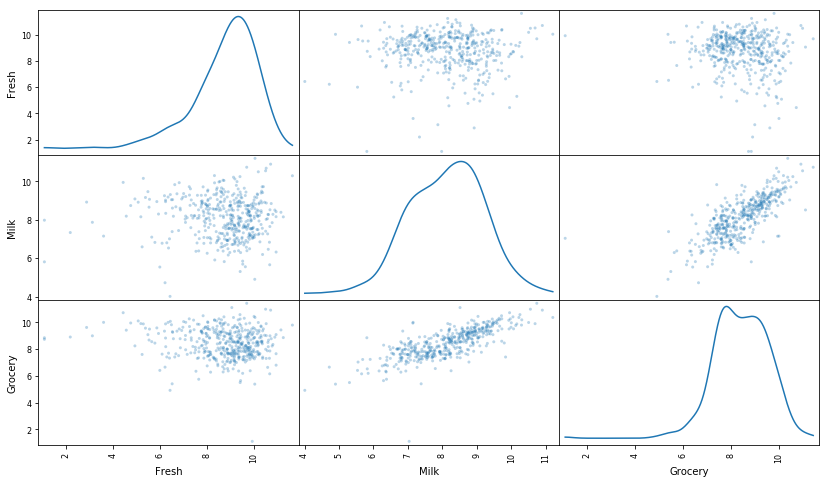

In [16]:
# Write your answer from here, add more cells if needed
log_data = np.log(customers)
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [21]:
outliers=[]

# For each feature find the data points with extreme high or low values
for feature in 'Fresh', 'Milk', 'Grocery':
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5

    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers= log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers) 
    outliers += feature_outliers.index.tolist()   

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery
65   4.442651   9.950323  10.732651
66   2.197225   7.335634   8.911530
81   5.389072   9.163249   9.575192
95   1.098612   7.979339   8.740657
96   3.135494   7.869402   9.001839
128  4.941642   9.087834   8.248791
171  5.298317  10.160530   9.894245
193  5.192957   8.156223   9.917982
218  2.890372   8.923191   9.629380
304  5.081404   8.917311  10.117510
305  5.493061   9.468001   9.088399
338  1.098612   5.808142   8.856661
353  4.762174   8.742574   9.961898
355  5.247024   6.588926   7.606885
357  3.610918   7.150701  10.011086
412  4.574711   8.190077   9.425452

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery
86   10.039983  11.205013  10.377047
98    6.220590   4.718499   6.656727
154   6.432940   4.007333   4.919981
356  10.029503   4.897840   5.384495

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery
75   9.923192  7.036148  1.098612
154  6.432940  4.007333  4.919981

In [22]:
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True) 
print("Number of outliers (inc duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))

Number of outliers (inc duplicates):  22
New dataset with removed outliers has 419 samples with 3 features each.


### Question 6: Hypothesis testing (part 2) 

 By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
* The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The means of 'Fresh' in the log_data and good_log_data are different
* The means of 'Milk' in the log_data and good_log_data are different


In [23]:
# Write your answer from here, add more cells if needed
import statistics as sta
import math

print("log_data.Fresh")
z=log_data.Fresh
print(np.mean(z))
t=(np.mean(z)-5.5)*math.sqrt(len(z))/sta.stdev(z)
print(t)

print("good_data.Fresh")
z=good_data.Fresh
print(np.mean(z))
t=(np.mean(z)-5.5)*math.sqrt(len(z))/sta.stdev(z)
print(t)

log_data.Fresh
8.730544041198167
45.784592972684
good_data.Fresh
8.91250339307164
61.26165651079075
